In [6]:
import scipy
from scipy.integrate import odeint

import pandas as pd
import numpy as np
import datetime

import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
import datetime
import random

In [7]:
data=pd.read_csv("/Users/aishwaryasheelvant/Downloads/covid-19-data-master/rolling-averages/us-states.csv")

In [8]:
data
data['date'] = pd.to_datetime(data.date)

In [9]:

states=['Arkansas','Mississippi','Texas','Louisiana']
data=data.loc[data['state'].isin(states)]

In [10]:
data.state.unique()

array(['Texas', 'Louisiana', 'Mississippi', 'Arkansas'], dtype=object)

In [11]:
data=data.loc[(data.date>='2021-06-01') & (data.date<='2021-12-01')]

In [12]:
data.head()

,date,geoid,state,cases,cases_avg,cases_avg_per_100k,deaths,deaths_avg,deaths_avg_per_100k
25050,2021-06-01,USA-48,Texas,702,957.00,3.30,16,33.71,0.12
25069,2021-06-01,USA-28,Mississippi,42,120.57,4.05,2,2.86,0.10
25075,2021-06-01,USA-22,Louisiana,978,316.86,6.82,16,6.29,0.14
25090,2021-06-01,USA-05,Arkansas,69,133.57,4.43,1,1.43,0.05
25105,2021-06-02,USA-48,Texas,2347,1060.29,3.66,52,32.14,0.11


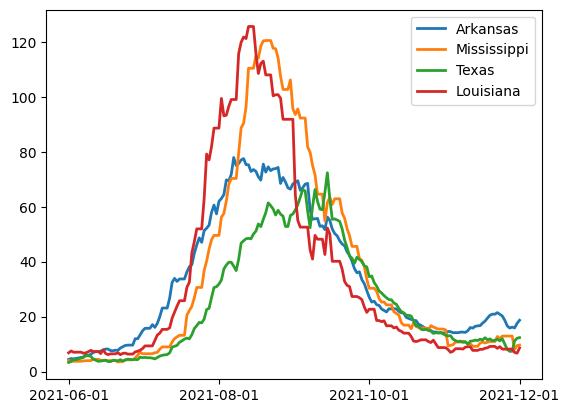

In [13]:
# ticks = [ '2020-08-01', '2020-10-01', '2020-12-01', '2021-02-01', '2020-12-01','2021-01-01','2021-02-01','2021-03-01']
ticks = [ '2021-06-01', '2021-08-01', '2021-10-01', '2021-12-01']
# ticks=['2021-08-01','2021-10-01','2021-12-01']
for s in states:
    selected_data=data.loc[data['state']==s]
    plt.plot(selected_data['date'],selected_data['cases_avg_per_100k'], label=s,linewidth=2)
plt.xticks(ticks)
# plt.gcf().autofmt_xdate()
plt.legend()
plt.show()

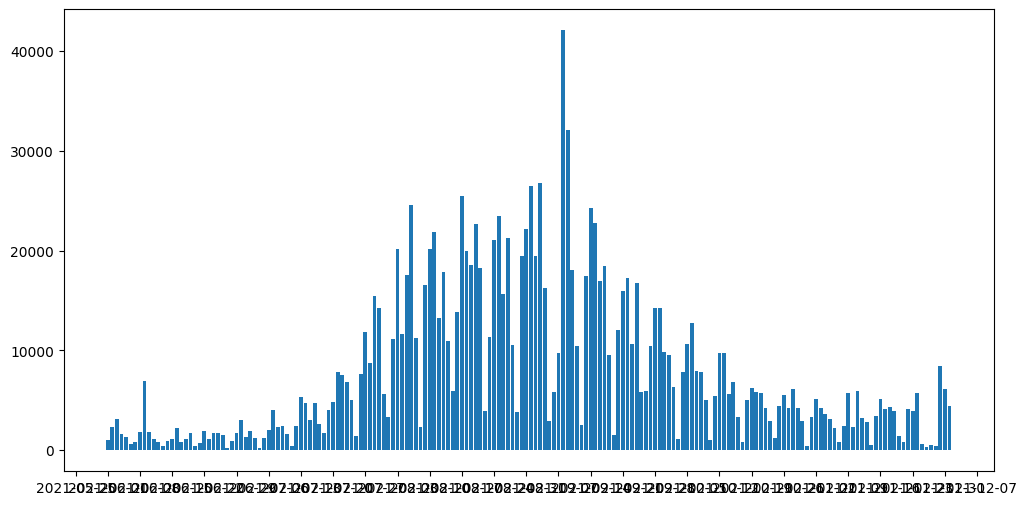

In [14]:
fig, ax = plt.subplots(1, 1, figsize=(12,6))
    
ax.bar(data['date'], data['cases'])
ax.xaxis_date()
#set ticks every week
ax.xaxis.set_major_locator(mdates.WeekdayLocator())
#set major ticks format
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))

plt.show()

In [15]:
from datetime import datetime
from datetime import timedelta
from dateutil import rrule

In [16]:
data['date_week'] = data['date'].apply(lambda x: x.isocalendar()[1])

data['date_year'] = data['date'].apply(lambda x: x.isocalendar()[0])


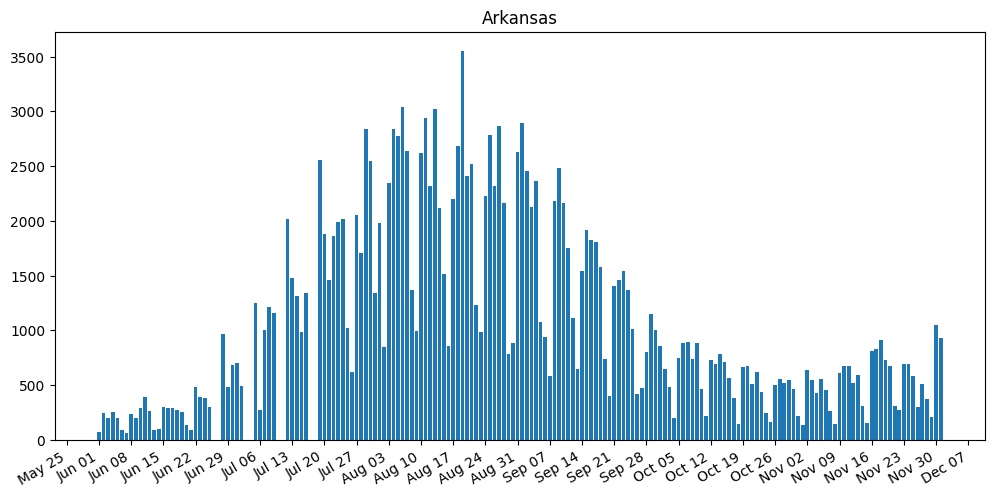

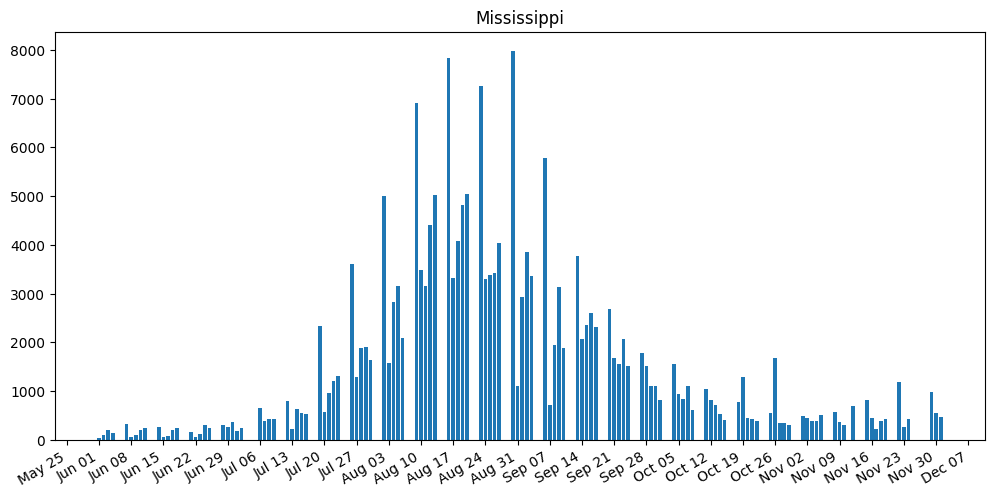

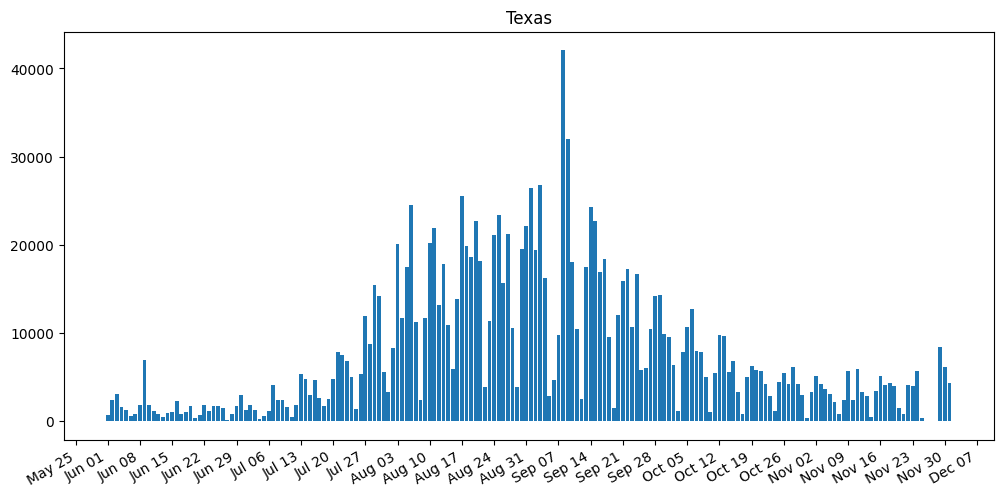

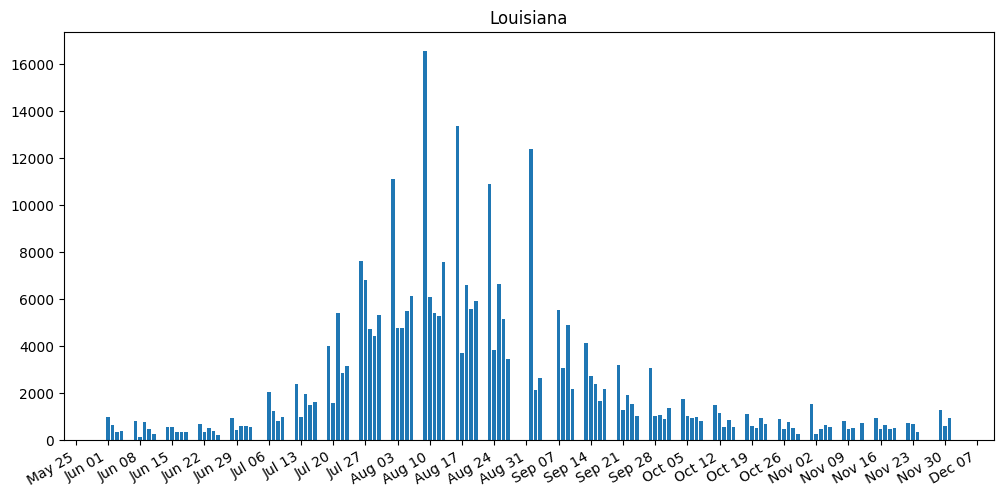

In [17]:
ticks = [ '2021-06-01', '2021-08-01', '2021-10-01', '2021-12-01']
for s in states:

    fig, ax = plt.subplots(1, 1, figsize=(12,6))
    selected_data=data.loc[data['state']==s]   
    ax.bar(selected_data['date'], selected_data['cases'])
    ax.xaxis_date()
    ax.xaxis.set_major_locator(mdates.WeekdayLocator())
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))
    plt.gcf().autofmt_xdate()
    plt.title(s)
    plt.show()

In [18]:
df=data.groupby(['state','date_week']).mean().reset_index()
df

,state,date_week,cases,cases_avg,cases_avg_per_100k,deaths,deaths_avg,deaths_avg_per_100k,date_year
0,Arkansas,22,175.333333,144.070000,4.775000,2.166667,1.761667,0.060000,2021.0
1,Arkansas,23,218.714286,193.428571,6.408571,2.142857,2.207143,0.075714,2021.0
2,Arkansas,24,234.428571,235.224286,7.794286,1.857143,2.552857,0.082857,2021.0
3,Arkansas,25,235.571429,274.631429,9.098571,2.714286,2.815714,0.092857,2021.0
4,Arkansas,26,475.000000,427.918571,14.178571,2.857143,2.980000,0.095714,2021.0
...,...,...,...,...,...,...,...,...,...
103,Texas,44,3212.285714,3490.041429,12.037143,108.714286,115.304286,0.397143,2021.0
104,Texas,45,3274.142857,3164.612857,10.912857,118.857143,99.732857,0.344286,2021.0
105,Texas,46,3296.285714,3379.775714,11.654286,82.714286,89.611429,0.310000,2021.0
106,Texas,47,2024.000000,2802.345714,9.665714,33.428571,64.450000,0.220000,2021.0


In [19]:
df.loc[df['state']=='Arkansas']

,state,date_week,cases,cases_avg,cases_avg_per_100k,deaths,deaths_avg,deaths_avg_per_100k,date_year
0,Arkansas,22,175.333333,144.070000,4.775000,2.166667,1.761667,0.060000,2021.0
1,Arkansas,23,218.714286,193.428571,6.408571,2.142857,2.207143,0.075714,2021.0
2,Arkansas,24,234.428571,235.224286,7.794286,1.857143,2.552857,0.082857,2021.0
3,Arkansas,25,235.571429,274.631429,9.098571,2.714286,2.815714,0.092857,2021.0
4,Arkansas,26,475.000000,427.918571,14.178571,2.857143,2.980000,0.095714,2021.0
5,Arkansas,27,697.285714,603.552857,20.002857,5.000000,4.157143,0.138571,2021.0
6,Arkansas,28,1017.142857,978.734286,32.431429,6.285714,5.962857,0.200000,2021.0
7,Arkansas,29,1824.285714,1284.851429,42.577143,8.857143,7.085714,0.235714,2021.0
8,Arkansas,30,1869.428571,1701.387143,56.378571,14.714286,11.672857,0.387143,2021.0
9,Arkansas,31,2263.000000,2117.797143,70.175714,20.571429,19.531429,0.648571,2021.0


In [20]:
count=0
def epi_week(week):             #to get epiweek
    global count
    count+=1
    if week==22:
        count=1
    return count

df["EPI_WEEK"] = df['date_week'].apply(epi_week)

In [21]:
df.loc[df['state']=='Arkansas']

,state,date_week,cases,cases_avg,cases_avg_per_100k,deaths,deaths_avg,deaths_avg_per_100k,date_year,EPI_WEEK
0,Arkansas,22,175.333333,144.070000,4.775000,2.166667,1.761667,0.060000,2021.0,1
1,Arkansas,23,218.714286,193.428571,6.408571,2.142857,2.207143,0.075714,2021.0,2
2,Arkansas,24,234.428571,235.224286,7.794286,1.857143,2.552857,0.082857,2021.0,3
3,Arkansas,25,235.571429,274.631429,9.098571,2.714286,2.815714,0.092857,2021.0,4
4,Arkansas,26,475.000000,427.918571,14.178571,2.857143,2.980000,0.095714,2021.0,5
5,Arkansas,27,697.285714,603.552857,20.002857,5.000000,4.157143,0.138571,2021.0,6
6,Arkansas,28,1017.142857,978.734286,32.431429,6.285714,5.962857,0.200000,2021.0,7
7,Arkansas,29,1824.285714,1284.851429,42.577143,8.857143,7.085714,0.235714,2021.0,8
8,Arkansas,30,1869.428571,1701.387143,56.378571,14.714286,11.672857,0.387143,2021.0,9
9,Arkansas,31,2263.000000,2117.797143,70.175714,20.571429,19.531429,0.648571,2021.0,10


In [22]:
import altair as alt
selected_data=data.loc[data['state']=='Texas']   
line = alt.Chart(selected_data).mark_line(
color='blue',
size=3
).transform_window(
    rolling_mean='mean(cases)',
    
).encode(
    x='date:T',
    y='rolling_mean:Q'
)

points = alt.Chart(selected_data).mark_point().encode(
    x='date:T',
    y=alt.Y('cases:Q',
            axis=alt.Axis(title='Cases in Texas'))
)

points + line


alt.LayerChart(...)

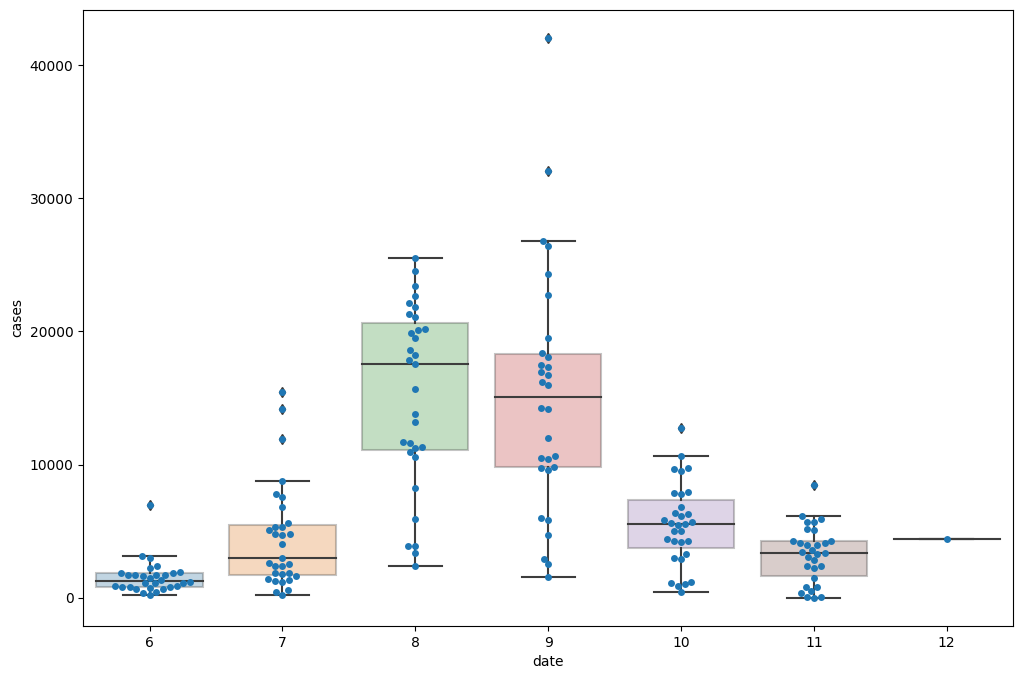

In [23]:
fig, ax = plt.subplots(figsize = (12,8))
sns.boxplot(data=selected_data, x=selected_data.date.dt.month, y = 'cases',  ax = ax, boxprops=dict(alpha=.3));
sns.swarmplot(data=selected_data, x=selected_data.date.dt.month, y = 'cases');

In [24]:
import altair as alt
selected_data=data.loc[data['state']=='Mississippi']   
line = alt.Chart(selected_data).mark_line(
color='blue',
size=3
).transform_window(
    rolling_mean='mean(cases)',
    
).encode(
    x='date:T',
    y='rolling_mean:Q'
)

points = alt.Chart(selected_data).mark_point().encode(
    x='date:T',
    y=alt.Y('cases:Q',
            axis=alt.Axis(title='Cases in Mississippi'))
)

points + line

alt.LayerChart(...)

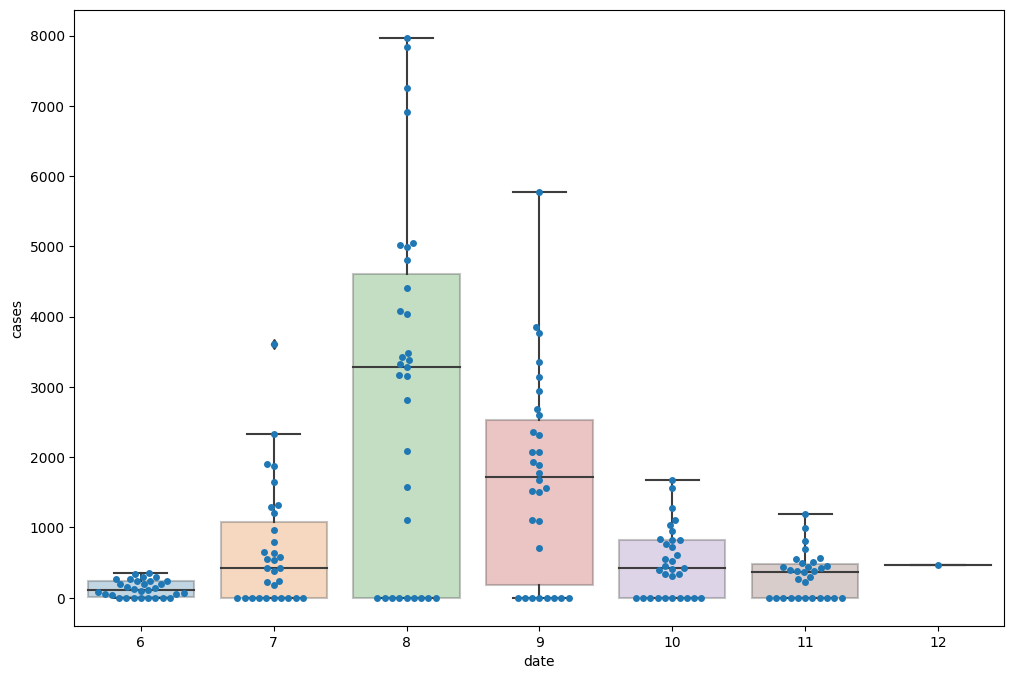

In [25]:
fig, ax = plt.subplots(figsize = (12,8))
sns.boxplot(data=selected_data, x=selected_data.date.dt.month, y = 'cases',  ax = ax, boxprops=dict(alpha=.3));
sns.swarmplot(data=selected_data, x=selected_data.date.dt.month, y = 'cases');

In [26]:
import altair as alt
selected_data=data.loc[data['state']=='Arkansas']   
line = alt.Chart(selected_data).mark_line(
color='blue',
size=3
).transform_window(
    rolling_mean='mean(cases)',
    
).encode(
    x='date:T',
    y='rolling_mean:Q'
)

points = alt.Chart(selected_data).mark_point().encode(
    x='date:T',
    y=alt.Y('cases:Q',
            axis=alt.Axis(title='Cases in Arkansas'))
)

points + line

alt.LayerChart(...)

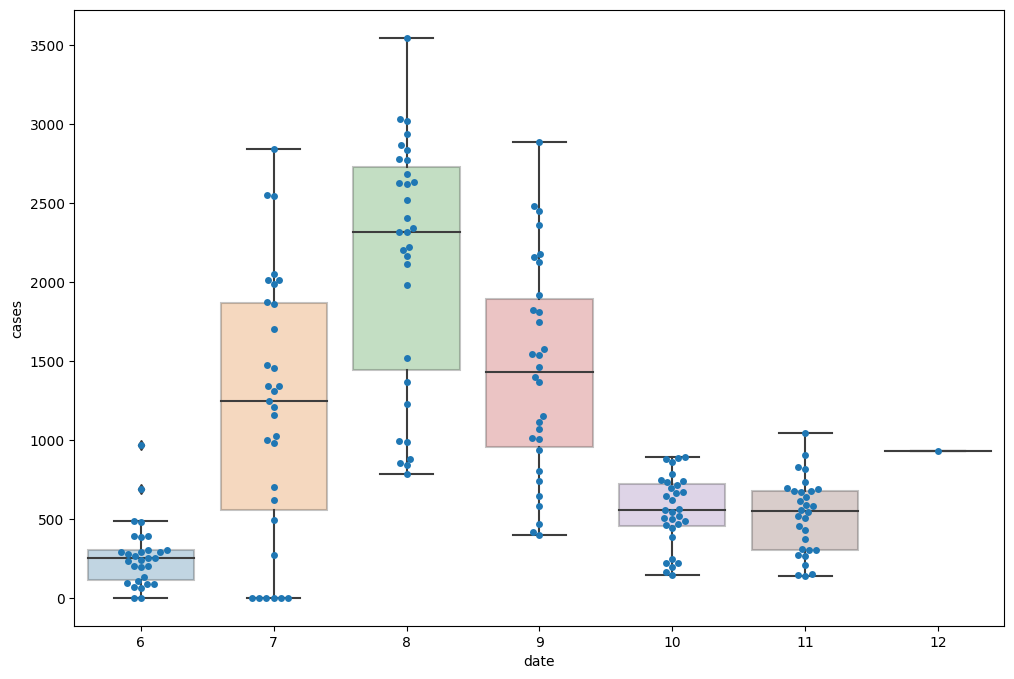

In [27]:
fig, ax = plt.subplots(figsize = (12,8))
sns.boxplot(data=selected_data, x=selected_data.date.dt.month, y = 'cases',  ax = ax, boxprops=dict(alpha=.3));
sns.swarmplot(data=selected_data, x=selected_data.date.dt.month, y = 'cases');

In [28]:
import altair as alt
selected_data=data.loc[data['state']=='Louisiana']   
line = alt.Chart(selected_data).mark_line(
color='blue',
size=3
).transform_window(
    rolling_mean='mean(cases)',
    
).encode(
    x='date:T',
    y='rolling_mean:Q'
)

points = alt.Chart(selected_data).mark_point().encode(
    x='date:T',
    y=alt.Y('cases:Q',
            axis=alt.Axis(title='Cases in Louisiana'))
)

points + line

alt.LayerChart(...)

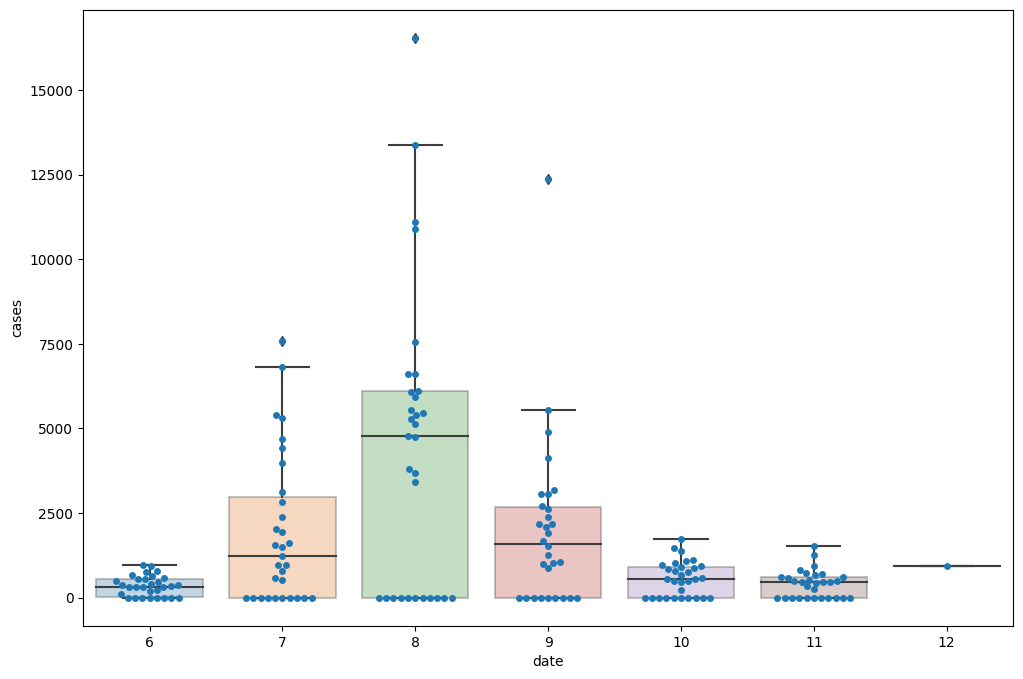

In [29]:
fig, ax = plt.subplots(figsize = (12,8))
sns.boxplot(data=selected_data, x=selected_data.date.dt.month, y = 'cases',  ax = ax, boxprops=dict(alpha=.3));
sns.swarmplot(data=selected_data, x=selected_data.date.dt.month, y = 'cases');